In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import librosa

from dataloader import MedleyDBLoader, MDBMelodySynthLoader, MIR1KLoader

import IPython.display as ipd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'resampy'

In [4]:
def plot_f0_trajectory(Y, t, f, f0, t_f0, figsize=(8.5, 3.4), xlim=(0, 11.5), ylim=(100, 2000), clim=(-60, 20), title=None):
    """
    Plot a calculated f0 trajectory on the corresponding spectrogram
    
    Parameters
    ----------
    Y : np.ndarray
        spectrogram
    t : np.ndarray
        time axis of the spectrogram
    f : np.ndarray
        log-frequency axis of the spectrogram in cents
    f0 : np.ndarray
        f0 trajectory in cents
    t_f0 : np.ndarray
        time points of the f0 trajectory frames
    figsize : tuple
        figure size
    xlim : tuple
        x-limits
    ylim : tuple
        y-limits
    """
    plt.figure(figsize=figsize)
    
    if title is not None:
        plt.title(title)

    plt.imshow(np.clip(Y, clim[0], clim[1]), cmap='gray_r', aspect='auto', origin='lower', extent=[t[0], t[-1], f[0], f[-1]])
    plt.plot(t_f0, f0, linestyle='', marker='.', markersize=5, color=[192/256, 0, 0])

    plt.xlim(xlim)
    plt.ylim(ylim)

    plt.gca().tick_params(axis='both', which='major', labelsize=10)
    plt.gca().tick_params(axis='both', which='minor', labelsize=10)
    
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Frequency (Hz)", fontsize=12)
    
    cbar = plt.colorbar()
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Log-Magnitude', rotation=270)

    plt.tight_layout()
    plt.show()

In [19]:
# set parameters
fs = 44100. # sampling rate
N = 2048 # window size for STFT
H = 1024 # hop size for STFT

medleyDB = MedleyDBLoader(fs)
mdbSynth = MDBMelodySynthLoader(fs)
mir1k = MIR1KLoader(fs)

ids_mdb = medleyDB.get_ids()
ids_mdb2 = mdbSynth.get_ids()

print("The MedleyDB subset contains %i elements." % (len(ids_mdb)))
if ids_mdb.sort() == ids_mdb2.sort():
    print("The MDB-melody-synth subset shares the same IDs with our MedleyDB subset.")
    
print("The MIR-1K subset contains %i elements." % (mir1k.get_num_elements()))

The MedleyDB subset contains 65 elements.
The MDB-melody-synth subset shares the same IDs with our MedleyDB subset.
The MIR-1K subset contains 1000 elements.


In [9]:
print(ids_mdb)

['AClassicEducation_NightOwl_STEM_08', 'AimeeNorwich_Child_STEM_04', 'AlexanderRoss_GoodbyeBolero_STEM_06', 'AlexanderRoss_VelvetCurtain_STEM_06', 'Auctioneer_OurFutureFaces_STEM_08', 'AvaLuna_Waterduct_STEM_08', 'BigTroubles_Phantom_STEM_04', 'BrandonWebster_YesSirICanFly_STEM_02', 'CelestialShore_DieForUs_STEM_01', 'ClaraBerryAndWooldog_AirTraffic_STEM_08', 'ClaraBerryAndWooldog_Stella_STEM_07', 'ClaraBerryAndWooldog_WaltzForMyVictims_STEM_05', 'Creepoid_OldTree_STEM_08', 'DreamersOfTheGhetto_HeavyLove_STEM_06', 'EthanHein_1930sSynthAndUprightBass_STEM_04', 'FacesOnFilm_WaitingForGa_STEM_03', 'HeladoNegro_MitadDelMundo_STEM_08', 'HezekiahJones_BorrowedHeart_STEM_10', 'HopAlong_SisterCities_STEM_07', 'InvisibleFamiliars_DisturbingWildlife_STEM_09', 'LizNelson_Coldwar_STEM_02', 'LizNelson_Rainfall_STEM_01', 'MatthewEntwistle_DontYouEver_STEM_07', 'MatthewEntwistle_FairerHopes_STEM_14', 'MatthewEntwistle_ImpressionsOfSaturn_STEM_08', 'MatthewEntwistle_TheArch_STEM_10', 'Meaxic_TakeAStep

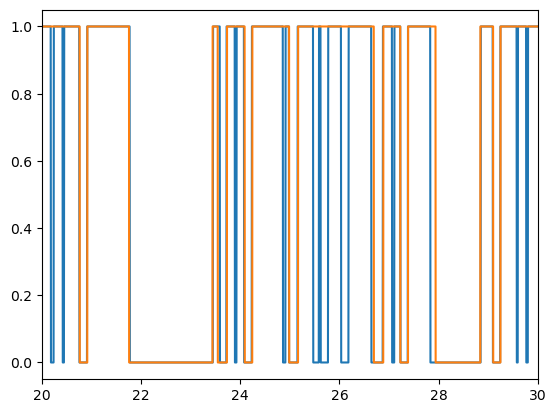

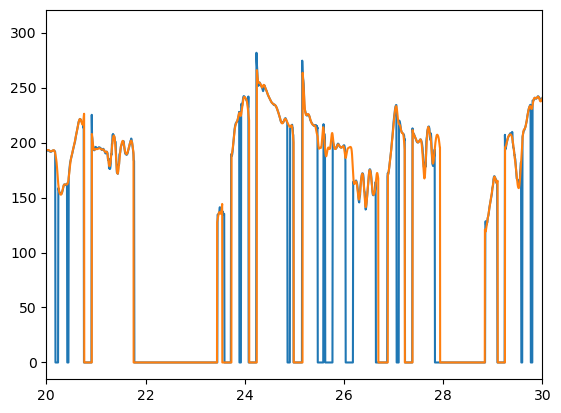

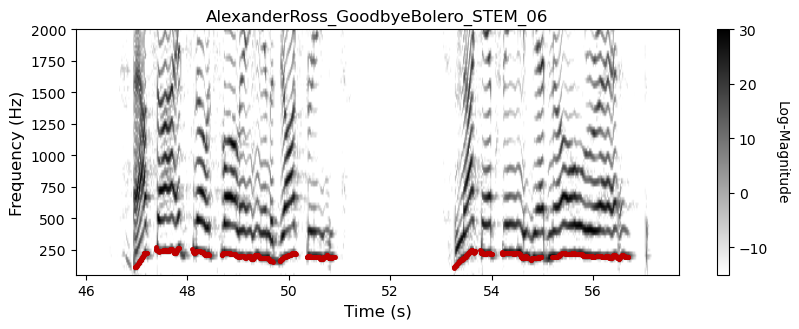

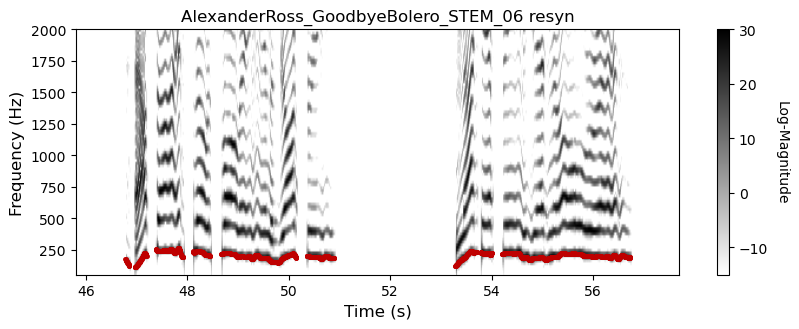

MedleyDB


MDB-melody-synth


In [31]:
# load an element from MedleyDB and MDB-melody-synth and plot excerpts to compare
my_id = 'AlexanderRoss_GoodbyeBolero_STEM_06'
start = 45.8 # start time of excerpts in seconds
end = 57.7 # end time of excerpt in seconds

x, f0 = medleyDB.load_data(my_id)
x_synth, f0_synth = mdbSynth.load_data(my_id)

plt.plot(f0[0,:], f0[1,:])
plt.plot(f0_synth[0,:], f0_synth[1,:])
plt.xlim(20, 30)
plt.show()

plt.plot(f0[0,:], f0[2,:])
plt.plot(f0_synth[0,:], f0_synth[2,:])
plt.xlim(20, 30)
plt.show()

X = librosa.stft(x[0], n_fft=N, hop_length=H, win_length=N, window='hann', pad_mode='constant', center=True)
Y = 20*np.log10(np.abs(X + 1e-8))

X_synth = librosa.stft(x_synth[0], n_fft=N, hop_length=H, win_length=N, window='hann', pad_mode='constant', center=True)
Y_synth = 20*np.log10(np.abs(X_synth + 1e-8))

t_stft = librosa.frames_to_time(np.arange(X.shape[1]), sr=fs, hop_length=H)
f_stft = librosa.fft_frequencies(sr=fs, n_fft=N)

is_f0_active = np.where(f0[1,:] == 1)
plot_f0_trajectory(Y, t_stft, f_stft, f0[2,is_f0_active], f0[0,is_f0_active], xlim=(start, end), ylim=(50, 2000), clim=(-15, 30), title=my_id)

is_f0_active = np.where(f0_synth[1,:] == 1)
plot_f0_trajectory(Y_synth, t_stft, f_stft, f0_synth[2,is_f0_active], f0_synth[0,is_f0_active], xlim=(start, end), ylim=(50, 2000), clim=(-15, 30), title=my_id+" resyn")

print("MedleyDB")
ipd.display(ipd.Audio(x[:,int(start*fs):int(end*fs)], rate=fs))
print("MDB-melody-synth")
ipd.display(ipd.Audio(x_synth[:,int(start*fs):int(end*fs)], rate=fs))

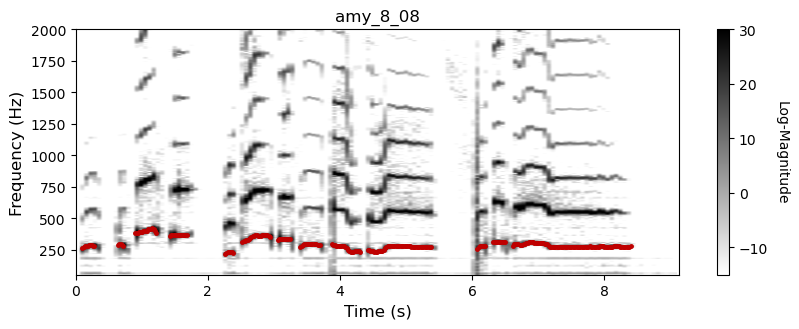

In [6]:
# load an element from MIR-1K and plot excerpt
my_id = 'amy_8_08'

x, f0 = mir1k.load_data(my_id)
X = librosa.stft(x[0], n_fft=N, hop_length=H, win_length=N, window='hann', pad_mode='constant', center=True)
Y = 20*np.log10(np.abs(X + 1e-8))

t_stft = librosa.frames_to_time(np.arange(X.shape[1]), sr=fs, hop_length=H)
f_stft = librosa.fft_frequencies(sr=fs, n_fft=N)

is_f0_active = np.where(f0[1,:] == 1)
plot_f0_trajectory(Y, t_stft, f_stft, f0[2,is_f0_active], f0[0,is_f0_active], xlim=(0, x.shape[1]/fs), ylim=(50, 2000), clim=(-15, 30), title=my_id)

ipd.display(ipd.Audio(x, rate=fs))